In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
import requests
from bs4 import BeautifulSoup
import csv

place_name = ["Tokyo"]

# URLで年と月ごとの設定ができるので%sで指定した英数字を埋め込めるようにする
base_url = "http://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=%s&month=%s&day=1&view=p1"

#取ったデータをfloat型に変える
def str2float(str):
  try:
    return float(str)
  except:
    return 0.0
if __name__ == "__main__":
  #都市を網羅
  for place in place_name:
    #最終的にデータを集めるリスト
    All_list = [['Date', 'precipitation', 'temp_avg', 'temp_max', 'temp_min', 'windspeed', 'snowfall']]

    # for文で該当期間抽出
    for year in range(1950,2023):
      print(year)
      # その年の1月～12月の12回を網羅する
      for month in range(1,13):
       #年と月を当てはめる
        r = requests.get(base_url%(year, month))
        r.encoding = r.apparent_encoding

        # サイトごとスクレイピング
        soup = BeautifulSoup(r.text)
        # findAllで条件に一致するものをすべて抜き出す
        # 今回の条件はtrタグでclassがmtxになっているもの
        rows = soup.findAll('tr',class_='mtx')

        # 表の最初の1~4行目はカラム情報なのでスライスする
        rows = rows[4:]

        # 1日〜最終日までの１行を取得
        for row in rows:
          # trのなかのtdをすべて抜き出す
          data = row.findAll('td')

          #１行の中には様々なデータがあるので全部取り出す
          rowData = [] #初期化
          rowData.append(str(year) + "/" + str(month) + "/" + str(data[0].string))
          rowData.append(str2float(data[3].string))
          rowData.append(str2float(data[6].string))
          rowData.append(str2float(data[7].string))
          rowData.append(str2float(data[8].string))
          rowData.append(str2float(data[11].string))
          rowData.append(str2float(data[17].string))

          #次の行にデータを追加
          All_list.append(rowData)

    #ファイルを生成
    with open(place + '.csv', 'w',encoding="utf_8_sig") as file: #文字化け防止
      writer = csv.writer(file, lineterminator='\n')
      writer.writerows(All_list)

Tokyo
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("Tokyo.csv", index_col="Date")

In [3]:
weather.loc["1960/1/1":"1960/3/21",:]

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall
Date,,,,,,
1960/1/1,1.9,7.8,11.3,3.0,0.0,0.0
1960/1/2,0.0,5.6,10.1,0.9,0.0,0.0
1960/1/3,0.0,5.1,12.1,-0.5,0.0,0.0
1960/1/4,0.0,7.3,16.8,-0.6,0.0,0.0
1960/1/5,0.0,10.8,21.0,1.5,0.0,0.0
...,...,...,...,...,...,...
1960/3/17,0.0,7.5,13.8,1.2,0.0,0.0
1960/3/18,0.0,7.4,13.3,3.3,0.0,0.0
1960/3/19,0.0,8.0,14.5,0.8,0.0,0.0


In [31]:
weather.apply(pd.isnull).sum()/weather.shape[0]

precipitation    0.0
temp_avg         0.0
temp_max         0.0
temp_min         0.0
windspeed        0.0
snowfall         0.0
dtype: float64

In [32]:
weather.apply(pd.isnull).sum()

precipitation    0
temp_avg         0
temp_max         0
temp_min         0
windspeed        0
snowfall         0
dtype: int64

In [33]:
weather["snowfall"].value_counts()

0.0     26538
1.0        35
2.0        24
3.0        12
5.0         9
9.0         7
7.0         5
6.0         5
4.0         5
10.0        3
16.0        2
15.0        2
21.0        2
8.0         2
11.0        2
13.0        2
18.0        2
14.0        1
33.0        1
26.0        1
17.0        1
27.0        1
23.0        1
Name: snowfall, dtype: int64

In [34]:
weather["precipitation"].value_counts()

0.0      17776
0.5        808
1.0        459
1.5        398
2.0        290
         ...  
37.4         1
67.1         1
98.8         1
38.7         1
112.5        1
Name: precipitation, Length: 544, dtype: int64

In [35]:
weather[pd.isnull(weather["temp_avg"])]

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall
Date,,,,,,


In [36]:
weather.dtypes

precipitation    float64
temp_avg         float64
temp_max         float64
temp_min         float64
windspeed        float64
snowfall         float64
dtype: object

In [6]:
weather.index

Index(['1950/1/1', '1950/1/2', '1950/1/3', '1950/1/4', '1950/1/5', '1950/1/6',
       '1950/1/7', '1950/1/8', '1950/1/9', '1950/1/10',
       ...
       '2022/12/22', '2022/12/23', '2022/12/24', '2022/12/25', '2022/12/26',
       '2022/12/27', '2022/12/28', '2022/12/29', '2022/12/30', '2022/12/31'],
      dtype='object', name='Date', length=26663)

In [5]:
print(weather.index.dtype)

object


In [3]:
weather.index = pd.to_datetime(weather.index)

In [8]:
print(weather.index.dtype)

datetime64[ns]


In [39]:
weather.index

DatetimeIndex(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04',
               '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08',
               '1950-01-09', '1950-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=26663, freq=None)

In [40]:
weather.index.year

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Date', length=26663)

In [41]:
weather.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=26663)

In [5]:
weather.apply(lambda x: (x==0).sum())

precipitation    17776
temp_avg             9
temp_max             6
temp_min            90
windspeed         4190
snowfall         26538
dtype: int64

<AxesSubplot:xlabel='Date'>

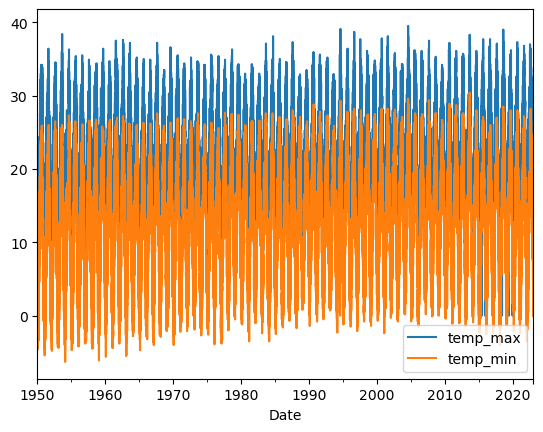

In [43]:
weather[["temp_max","temp_min"]].plot()

In [44]:
weather.index.year.value_counts().sort_index()

1950    365
1951    365
1952    366
1953    365
1954    365
       ... 
2018    365
2019    365
2020    366
2021    365
2022    365
Name: Date, Length: 73, dtype: int64

<AxesSubplot:xlabel='Date'>

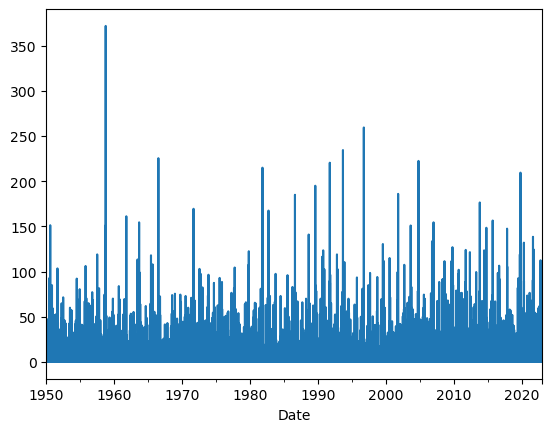

In [45]:
weather["precipitation"].plot()

In [46]:
weather.groupby(weather.index.year).sum()["precipitation"]

Date
1950    1951.7
1951    1589.8
1952    1640.6
1953    1519.4
1954    1770.7
         ...  
2018    1445.5
2019    1874.0
2020    1590.0
2021    2052.5
2022    1615.5
Name: precipitation, Length: 73, dtype: float64

<AxesSubplot:xlabel='Date'>

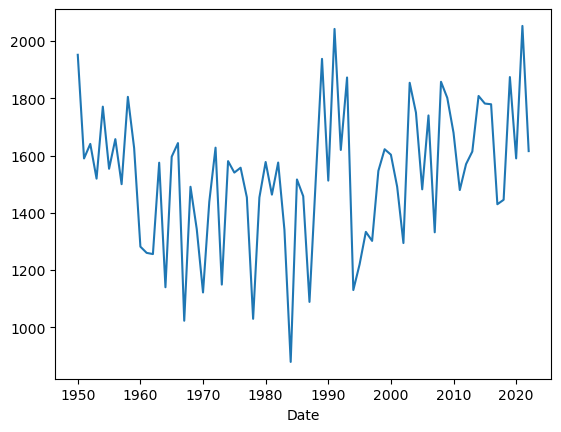

In [47]:
weather.groupby(weather.index.year).sum()["precipitation"].plot()

In [16]:
weather["target"]=weather.shift(-1)["temp_max"]

In [11]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target
Date,,,,,,,
1950-01-01,16.7,3.5,4.7,2.2,0.0,0.0,8.3
1950-01-02,0.1,5.5,8.3,3.4,0.0,0.0,11.7
1950-01-03,0.0,7.2,11.7,4.1,0.0,0.0,9.2
1950-01-04,0.0,5.8,9.2,2.3,0.0,0.0,5.8
1950-01-05,0.0,2.6,5.8,0.6,0.0,0.0,7.5
...,...,...,...,...,...,...,...
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7
2022-12-29,0.0,8.1,13.7,2.9,2.0,0.0,11.8


In [17]:
weather= weather.iloc[:-1,:].copy()

In [13]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target
Date,,,,,,,
1950-01-01,16.7,3.5,4.7,2.2,0.0,0.0,8.3
1950-01-02,0.1,5.5,8.3,3.4,0.0,0.0,11.7
1950-01-03,0.0,7.2,11.7,4.1,0.0,0.0,9.2
1950-01-04,0.0,5.8,9.2,2.3,0.0,0.0,5.8
1950-01-05,0.0,2.6,5.8,0.6,0.0,0.0,7.5
...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7


In [18]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [19]:
predictors = ["precipitation", "temp_max", "temp_min"]

In [20]:
train = weather.loc[:"2008/12/31"]

In [21]:
test = weather.loc["2009/1/1":]

In [22]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [23]:
predictions = reg.predict(test[predictors])

In [13]:
predictions

array([10.58327274, 11.73174429, 10.81279542, ..., 12.6068825 ,
       11.68621734, 11.22528405])

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
mean_absolute_error(test["target"],predictions)

2.422452483454122

In [26]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [34]:
combined

,actual,predictions
Date,,
2009-01-01,11.6,10.583273
2009-01-02,10.7,11.731744
2009-01-03,11.1,10.812795
2009-01-04,11.8,12.051978
2009-01-05,12.5,12.970583
...,...,...
2022-12-26,12.3,11.043348
2022-12-27,11.9,11.549465
2022-12-28,13.7,11.732259


<AxesSubplot:xlabel='Date'>

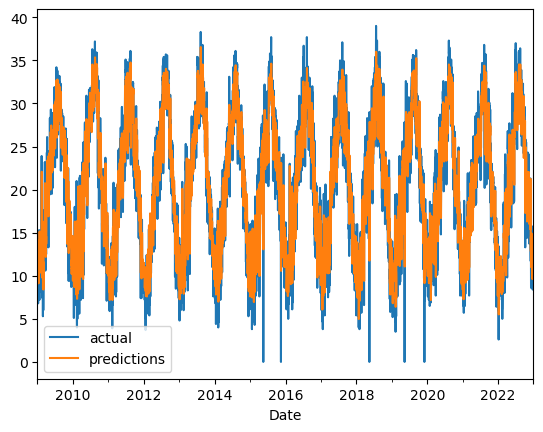

In [35]:
combined.plot()

In [27]:
reg.coef_

array([0.0200035, 0.4604184, 0.4587021])

In [28]:
def create_predictions(predictors, weather, reg):
    train = weather.loc[:"2008/12/31"]
    test = weather.loc["2009/1/1":]
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    error =mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [29]:
weather["month_max"] = weather["temp_max"].rolling(30).mean()

In [30]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max
Date,,,,,,,,
1950-01-01,16.7,3.5,4.7,2.2,0.0,0.0,8.3,NaN
1950-01-02,0.1,5.5,8.3,3.4,0.0,0.0,11.7,NaN
1950-01-03,0.0,7.2,11.7,4.1,0.0,0.0,9.2,NaN
1950-01-04,0.0,5.8,9.2,2.3,0.0,0.0,5.8,NaN
1950-01-05,0.0,2.6,5.8,0.6,0.0,0.0,7.5,NaN
...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000


In [31]:
weather["month_day_max"] = weather["month_max"] / weather["temp_max"]

In [61]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max
Date,,,,,,,,,
1950-01-31,22.9,12.5,19.8,4.4,0.0,0.0,8.5,NaN,NaN
1950-02-01,0.0,4.4,8.5,1.4,0.0,0.0,11.4,NaN,NaN
1950-02-02,0.0,5.2,11.4,1.2,0.0,0.0,4.8,NaN,NaN
1950-02-03,7.7,2.2,4.8,1.2,0.0,0.0,8.1,NaN,NaN
1950-02-04,0.1,4.0,8.1,-0.1,0.0,0.0,9.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311


In [32]:
weather = weather.iloc[30:,:].copy()

In [63]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max
Date,,,,,,,,,
1950-03-02,0.0,6.0,14.4,-1.7,0.0,0.0,9.9,9.593333,0.666204
1950-03-03,0.7,4.9,9.9,1.8,0.0,0.0,16.3,9.640000,0.973737
1950-03-04,0.0,7.7,16.3,0.3,0.0,0.0,17.7,9.803333,0.601431
1950-03-05,0.0,8.6,17.7,0.8,0.0,0.0,16.3,10.233333,0.578154
1950-03-06,0.0,9.8,16.3,2.2,0.0,0.0,17.9,10.506667,0.644581
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311


In [44]:
weather.isna()

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max
Date,,,,,,,,,
1950-01-31,False,False,False,False,False,False,False,False,False
1950-02-01,False,False,False,False,False,False,False,False,False
1950-02-02,False,False,False,False,False,False,False,False,False
1950-02-03,False,False,False,False,False,False,False,False,False
1950-02-04,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2022-12-26,False,False,False,False,False,False,False,False,False
2022-12-27,False,False,False,False,False,False,False,False,False
2022-12-28,False,False,False,False,False,False,False,False,False


In [33]:
error, combined = create_predictions(predictors, weather, reg)

In [34]:
missing = weather.isna().any()
print(missing[missing == True])


Series([], dtype: bool)


In [35]:
import numpy as np

infs = np.isinf(weather)
inf_rows = infs.any(axis=1)
print(inf_rows)

Date
1950-01-31    False
1950-02-01    False
1950-02-02    False
1950-02-03    False
1950-02-04    False
              ...  
2022-12-26    False
2022-12-27    False
2022-12-28    False
2022-12-29    False
2022-12-30    False
Length: 26632, dtype: bool


In [48]:
import numpy as np

# float64の最大値と最小値を取得
float64_max = np.finfo(np.float64).max
float64_min = np.finfo(np.float64).min

# データフレーム内の値が最大値と最小値の範囲外かどうかを検出
is_out_of_range = (weather > float64_max) | (weather < float64_min)

# 範囲外の値がある行と列を取得
rows_with_out_of_range = weather.index[is_out_of_range.any(axis=1)]
cols_with_out_of_range = weather.columns[is_out_of_range.any(axis=0)]

if len(rows_with_out_of_range) == 0 and len(cols_with_out_of_range) == 0:
    print("データフレームにfloat64の範囲外の値はありません。")
else:
    print("以下の行、列にfloat64の範囲外の値があります。")
    print("行:", rows_with_out_of_range)
    print("列:", cols_with_out_of_range)

以下の行、列にfloat64の範囲外の値があります。
行: DatetimeIndex(['1967-02-11', '2015-05-18', '2015-11-16', '2018-05-15',
               '2019-05-13', '2019-12-03'],
              dtype='datetime64[ns]', name='Date', freq=None)
列: Index(['month_day_max'], dtype='object')


In [49]:
weather.loc['1951-12-21']

precipitation     0.000000
temp_avg          7.300000
temp_max         16.900000
temp_min          0.000000
windspeed         0.000000
snowfall          0.000000
target           10.500000
month_max        14.496667
month_day_max     0.857791
Name: 1951-12-21 00:00:00, dtype: float64

In [50]:
print(weather.max_min.tail(50))

AttributeError: 'DataFrame' object has no attribute 'max_min'

In [102]:
weather["max_min"].value_counts()

 2.000000     97
 inf          90
 1.250000     53
 1.500000     52
 1.333333     38
              ..
-52.000000     1
 2.914286      1
-5.111111      1
-8.846154      1
 4.214286      1
Name: max_min, Length: 13739, dtype: int64

In [26]:
inf_rows = weather[weather.isin([np.inf, -np.inf]).any(axis=1)]
print(inf_rows)

            precipitation  temp_avg  temp_max  temp_min  windspeed  snowfall  \
Date                                                                           
1967-02-11            7.0      -0.6       0.0      -1.2        4.2      16.0   
2015-05-18            3.5      21.5       0.0      17.5        3.6       0.0   
2015-11-16            0.0      17.2       0.0      12.2        0.0       0.0   
2018-05-15            0.0      22.3       0.0      14.8        3.6       0.0   
2019-05-13            0.0      17.7       0.0      13.3        0.0       0.0   
2019-12-03            0.0       0.0       0.0       9.1        0.0       0.0   

            target  month_max  month_day_max  
Date                                          
1967-02-11    -0.2   9.563333            inf  
2015-05-18    24.2  23.793333            inf  
2015-11-16    23.7  19.783333            inf  
2018-05-15    29.0  21.983333            inf  
2019-05-13    19.3  21.383333            inf  
2019-12-03    15.3  16.510000 

In [36]:
inf_count = np.isinf(weather['month_day_max']).sum()

print("The number of inf values in 'month_day_max' column is:", inf_count)

The number of inf values in 'month_day_max' column is: 6


In [37]:
weather = weather[~np.isinf(weather['month_day_max'])].copy()

In [38]:
inf_count = np.isinf(weather['month_day_max']).sum()

print("The number of inf values in 'month_day_max' column is:", inf_count)

The number of inf values in 'month_day_max' column is: 0


In [39]:
predictors = ["precipitation", "temp_max", "temp_min", "month_day_max"]

In [40]:
error, combined = create_predictions(predictors, weather, reg)

In [41]:
error

2.398608718250408

<AxesSubplot:xlabel='Date'>

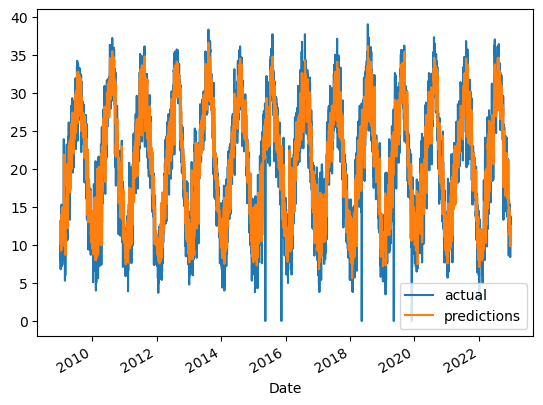

In [72]:
combined.plot()

In [73]:
combined

,actual,predictions
Date,,
2009-01-01,11.6,10.680540
2009-01-02,10.7,11.753714
2009-01-03,11.1,10.877569
2009-01-04,11.8,12.033323
2009-01-05,12.5,12.901587
...,...,...
2022-12-26,12.3,11.081851
2022-12-27,11.9,11.555484
2022-12-28,13.7,11.720768


In [42]:
weather["monthly_avg"] = weather["temp_max"].groupby(weather.index.month).apply(lambda x: x.expanding(1).mean())

In [75]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg
Date,,,,,,,,,,
1950-03-02,0.0,6.0,14.4,-1.7,0.0,0.0,9.9,9.593333,0.666204,14.400000
1950-03-03,0.7,4.9,9.9,1.8,0.0,0.0,16.3,9.640000,0.973737,12.150000
1950-03-04,0.0,7.7,16.3,0.3,0.0,0.0,17.7,9.803333,0.601431,13.533333
1950-03-05,0.0,8.6,17.7,0.8,0.0,0.0,16.3,10.233333,0.578154,14.575000
1950-03-06,0.0,9.8,16.3,2.2,0.0,0.0,17.9,10.506667,0.644581,14.920000
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631


In [43]:
predictors = ["precipitation", "temp_max", "temp_min", "month_day_max", "monthly_avg"]

In [44]:
error, combined = create_predictions(predictors, weather, reg)

In [45]:
error

2.356255056879193

In [40]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg
Date,,,,,,,,,,
1950-03-02,0.0,6.0,14.4,-1.7,0.0,0.0,9.9,9.593333,0.666204,14.400000
1950-03-03,0.7,4.9,9.9,1.8,0.0,0.0,16.3,9.640000,0.973737,12.150000
1950-03-04,0.0,7.7,16.3,0.3,0.0,0.0,17.7,9.803333,0.601431,13.533333
1950-03-05,0.0,8.6,17.7,0.8,0.0,0.0,16.3,10.233333,0.578154,14.575000
1950-03-06,0.0,9.8,16.3,2.2,0.0,0.0,17.9,10.506667,0.644581,14.920000
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631


In [46]:
weather["day_of_year_avg"] = weather["temp_max"].groupby(weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [80]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg,day_of_year_avg
Date,,,,,,,,,,,
1950-03-02,0.0,6.0,14.4,-1.7,0.0,0.0,9.9,9.593333,0.666204,14.400000,14.400000
1950-03-03,0.7,4.9,9.9,1.8,0.0,0.0,16.3,9.640000,0.973737,12.150000,9.900000
1950-03-04,0.0,7.7,16.3,0.3,0.0,0.0,17.7,9.803333,0.601431,13.533333,16.300000
1950-03-05,0.0,8.6,17.7,0.8,0.0,0.0,16.3,10.233333,0.578154,14.575000,17.700000
1950-03-06,0.0,9.8,16.3,2.2,0.0,0.0,17.9,10.506667,0.644581,14.920000,16.300000
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742,10.835616
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775,11.064384
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631,10.663014


In [47]:
predictors = ["precipitation", "temp_max", "temp_min", "month_day_max", "monthly_avg", "day_of_year_avg"]

In [82]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg,day_of_year_avg
Date,,,,,,,,,,,
1950-03-02,0.0,6.0,14.4,-1.7,0.0,0.0,9.9,9.593333,0.666204,14.400000,14.400000
1950-03-03,0.7,4.9,9.9,1.8,0.0,0.0,16.3,9.640000,0.973737,12.150000,9.900000
1950-03-04,0.0,7.7,16.3,0.3,0.0,0.0,17.7,9.803333,0.601431,13.533333,16.300000
1950-03-05,0.0,8.6,17.7,0.8,0.0,0.0,16.3,10.233333,0.578154,14.575000,17.700000
1950-03-06,0.0,9.8,16.3,2.2,0.0,0.0,17.9,10.506667,0.644581,14.920000,16.300000
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742,10.835616
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775,11.064384
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631,10.663014


In [48]:
predictors = ["precipitation", "temp_max", "temp_min", "month_day_max", "monthly_avg", "day_of_year_avg"]

In [49]:
error, combined = create_predictions(predictors, weather, reg)

In [50]:
error

2.3435874701388304

In [51]:
extrainfo = pd.read_csv("Tokyo(extrainfo).csv", index_col="Date")

In [52]:
extrainfo.index = pd.to_datetime(extrainfo.index)

In [53]:
weather2 = pd.merge(weather, extrainfo, on="Date")

In [109]:
weather2

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg,day_of_year_avg,humidity_avg,humidity_min,windspeed_max
Date,,,,,,,,,,,,,,
1950-03-02,0.0,6.0,14.4,-1.7,0.0,0.0,9.9,9.593333,0.666204,14.400000,14.400000,0.0,0.0,0.0
1950-03-03,0.7,4.9,9.9,1.8,0.0,0.0,16.3,9.640000,0.973737,12.150000,9.900000,0.0,0.0,0.0
1950-03-04,0.0,7.7,16.3,0.3,0.0,0.0,17.7,9.803333,0.601431,13.533333,16.300000,0.0,0.0,0.0
1950-03-05,0.0,8.6,17.7,0.8,0.0,0.0,16.3,10.233333,0.578154,14.575000,17.700000,0.0,0.0,0.0
1950-03-06,0.0,9.8,16.3,2.2,0.0,0.0,17.9,10.506667,0.644581,14.920000,16.300000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742,10.835616,46.0,26.0,6.5
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775,11.064384,48.0,30.0,7.5
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631,10.663014,61.0,42.0,3.5


In [110]:
weather2["humidity_avg"].value_counts()

0.0     3985
68.0     591
73.0     588
69.0     582
72.0     577
        ... 
25.0      17
24.0       8
23.0       5
22.0       3
19.0       1
Name: humidity_avg, Length: 81, dtype: int64

<AxesSubplot:xlabel='Date'>

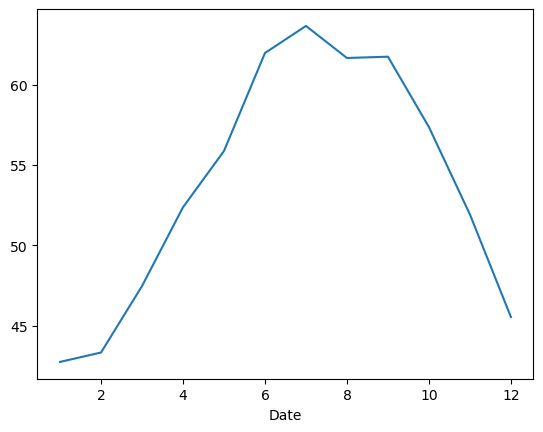

In [54]:
weather2.groupby(weather2.index.month).mean()["humidity_avg"].plot()

In [112]:
weather2.groupby(weather.index.month).mean()["humidity_avg"]

Date
1     42.751792
2     43.914412
3     47.477454
4     52.363927
5     55.869469
6     61.971689
7     63.658418
8     61.661069
9     61.742009
10    57.358374
11    51.915943
12    45.526758
Name: humidity_avg, dtype: float64

In [55]:
info_after_1961 = weather2.loc['1961-01-01':]

In [114]:
info_after_1961

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg,day_of_year_avg,humidity_avg,humidity_min,windspeed_max
Date,,,,,,,,,,,,,,
1961-01-01,0.0,2.1,7.9,-3.9,2.4,0.0,9.2,12.130000,1.535443,9.565916,11.200000,41.0,15.0,6.2
1961-01-02,0.0,1.5,9.2,-3.3,1.5,0.0,7.3,11.920000,1.295652,9.564744,9.472727,51.0,26.0,3.3
1961-01-03,0.1,2.5,7.3,-2.4,1.8,0.0,11.5,11.873333,1.626484,9.557508,9.345455,58.0,37.0,4.2
1961-01-04,20.2,4.7,11.5,0.6,4.5,0.0,7.7,11.973333,1.041159,9.563694,8.954545,60.0,38.0,10.2
1961-01-05,0.0,3.8,7.7,1.4,6.8,0.0,8.6,11.743333,1.525108,9.557778,11.254545,33.0,19.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742,10.835616,46.0,26.0,6.5
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775,11.064384,48.0,30.0,7.5
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631,10.663014,61.0,42.0,3.5


In [56]:
info_after_1961.groupby(info_after_1961.index.month).mean()["humidity_avg"]

Date
1     49.647242
2     51.016000
3     55.876171
4     61.654301
5     65.797290
6     72.966667
7     74.952653
8     72.600937
9     72.696237
10    67.534860
11    61.131791
12    53.612500
Name: humidity_avg, dtype: float64

In [57]:
new_weather= weather2[weather2['humidity_avg'] != 0]

In [58]:
new_weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg,day_of_year_avg,humidity_avg,humidity_min,windspeed_max
Date,,,,,,,,,,,,,,
1961-01-01,0.0,2.1,7.9,-3.9,2.4,0.0,9.2,12.130000,1.535443,9.598718,11.200000,41.0,15.0,6.2
1961-01-02,0.0,1.5,9.2,-3.3,1.5,0.0,7.3,11.920000,1.295652,9.597444,9.472727,51.0,26.0,3.3
1961-01-03,0.1,2.5,7.3,-2.4,1.8,0.0,11.5,11.873333,1.626484,9.590127,9.345455,58.0,37.0,4.2
1961-01-04,20.2,4.7,11.5,0.6,4.5,0.0,7.7,11.973333,1.041159,9.596190,8.954545,60.0,38.0,10.2
1961-01-05,0.0,3.8,7.7,1.4,6.8,0.0,8.6,11.743333,1.525108,9.590190,11.254545,33.0,19.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742,10.835616,46.0,26.0,6.5
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775,11.064384,48.0,30.0,7.5
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631,10.663014,61.0,42.0,3.5


In [59]:
def create_predictions2(predictors, new_weather, reg):
    train = new_weather.loc[:"2008/12/31"]
    test = new_weather.loc["2009/1/1":]
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    error =mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [60]:
predictors = ["precipitation", "temp_max", "temp_min", "month_day_max", "monthly_avg", "day_of_year_avg", "humidity_avg"]

In [61]:
error, combined = create_predictions2(predictors, new_weather, reg)

In [62]:
error

2.32314118482408

In [63]:
reg.coef_

array([0.007484  , 0.39902098, 0.20233394, 0.10375544, 0.05515024,
       0.3101038 , 0.01652342])

In [123]:
weather.corr()["target"]

precipitation      0.081375
temp_avg           0.930378
temp_max           0.911740
temp_min           0.915487
windspeed         -0.036722
snowfall          -0.070685
target             1.000000
month_max          0.880999
month_day_max     -0.186338
monthly_avg        0.901129
day_of_year_avg    0.912940
Name: target, dtype: float64

In [124]:
weather2.corr()["target"]

precipitation      0.081375
temp_avg           0.930378
temp_max           0.911740
temp_min           0.915487
windspeed         -0.036722
snowfall          -0.070685
target             1.000000
month_max          0.880999
month_day_max     -0.186338
monthly_avg        0.901129
day_of_year_avg    0.912940
humidity_avg       0.262689
humidity_min       0.309139
windspeed_max     -0.033182
Name: target, dtype: float64

In [125]:
combined["diff"]=(combined["actual"] - combined["predictions"]).abs()

In [126]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
Date,,,
2015-05-17,0.0,25.232675,25.232675
2019-05-12,0.0,22.425438,22.425438
2015-11-15,0.0,19.442018,19.442018
2019-12-02,0.0,15.689316,15.689316
2020-03-28,7.7,19.285462,11.585462


In [64]:
weather

,precipitation,temp_avg,temp_max,temp_min,windspeed,snowfall,target,month_max,month_day_max,monthly_avg,day_of_year_avg
Date,,,,,,,,,,,
1950-01-31,22.9,12.5,19.8,4.4,0.0,0.0,8.5,10.190000,0.514646,19.800000,19.800000
1950-02-01,0.0,4.4,8.5,1.4,0.0,0.0,11.4,10.196667,1.199608,8.500000,8.500000
1950-02-02,0.0,5.2,11.4,1.2,0.0,0.0,4.8,10.186667,0.893567,9.950000,11.400000
1950-02-03,7.7,2.2,4.8,1.2,0.0,0.0,8.1,10.040000,2.091667,8.233333,4.800000
1950-02-04,0.1,4.0,8.1,-0.1,0.0,0.0,9.9,10.116667,1.248971,8.200000,8.100000
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.0,6.3,11.4,1.8,3.6,0.0,12.3,13.130000,1.151754,12.225742,10.835616
2022-12-27,0.0,6.8,12.3,2.0,2.7,0.0,11.9,12.900000,1.048780,12.225775,11.064384
2022-12-28,0.0,6.5,11.9,2.8,1.4,0.0,13.7,12.820000,1.077311,12.225631,10.663014


In [66]:
new_weather.loc['2022-4-6']

precipitation       0.000000
temp_avg           15.500000
temp_max           21.800000
temp_min           10.600000
windspeed           2.100000
snowfall            0.000000
target             19.200000
month_max          16.360000
month_day_max       0.750459
monthly_avg        18.714451
day_of_year_avg    17.808219
humidity_avg       73.000000
humidity_min       35.000000
windspeed_max       5.900000
Name: 2022-04-06 00:00:00, dtype: float64

In [66]:
new_data = [[0.7, 9.9, 1.8, 0.97, 12.15, 9.9, 0.2]]
predictions = reg.predict(new_data)

# 予測結果を表示
print(predictions)

[9.19497039]


C:\Users\misak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [147]:
import pandas as pd
weather = weather.drop(['temp_avg', 'windspeed', 'snowfall'], axis=1)
weather.to_csv('new_weather.csv', index=False)

In [151]:
print(weather.tail(20))

            precipitation  temp_max  temp_min  target  month_max  \
Date                                                               
2022-12-11            0.0      15.2       6.4    11.8  16.523333   
2022-12-12            0.0      11.8       5.8    10.1  16.190000   
2022-12-13            3.5      10.1       5.3    15.4  15.723333   
2022-12-14            0.0      15.4       4.9    12.4  15.610000   
2022-12-15            0.0      12.4       3.0    14.1  15.543333   
2022-12-16            0.0      14.1       2.3    10.1  15.436667   
2022-12-17            3.5      10.1       4.5    11.3  15.183333   
2022-12-18            2.5      11.3       2.8    10.1  14.963333   
2022-12-19            0.0      10.1       0.0    10.9  14.683333   
2022-12-20            0.0      10.9       0.8     9.9  14.590000   
2022-12-21            0.0       9.9       2.8    10.7  14.326667   
2022-12-22           17.5      10.7       4.1     8.4  14.003333   
2022-12-23            0.0       8.4       2.2   

In [73]:
new_data = [[0.0, 11.8, 2.8, 1.04, 12.22, 10.98,50]]
predictions = reg.predict(new_data)

# 予測結果を表示
print(predictions)

[11.35484745]


C:\Users\misak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [78]:
new_data = []

for i in range(6):
    val = input(f"Enter value for index {i}: ")
    new_data.append(float(val))

predictions = reg.predict([new_data])

print(predictions)

Enter value for index 0:  0
Enter value for index 1:  0
Enter value for index 2:  9
Enter value for index 3:  9
Enter value for index 4:  9
Enter value for index 5:  0


[6.24600206]


C:\Users\misak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Date'>

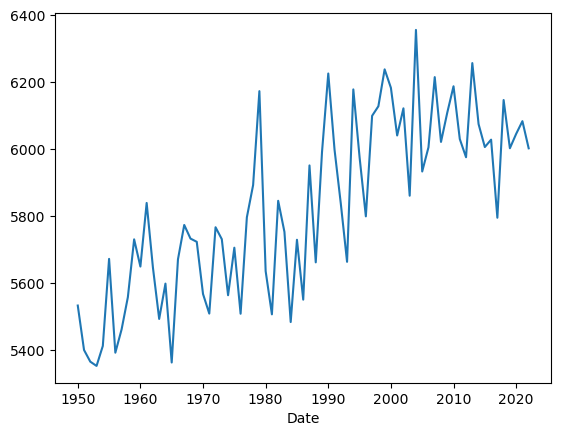

In [12]:
weather.groupby(weather.index.year).sum()["temp_avg"].plot()

<AxesSubplot:xlabel='Date'>

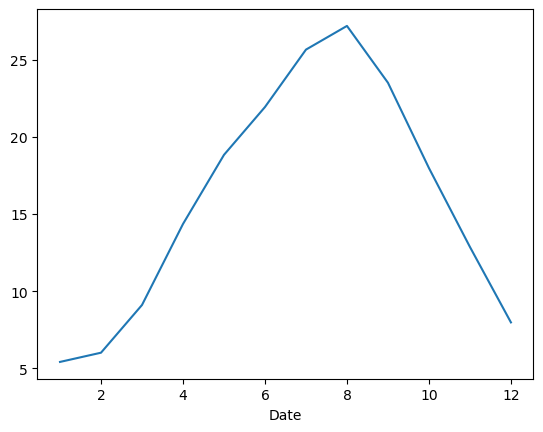

In [14]:
weather.groupby(weather.index.month).mean()["temp_avg"].plot()

In [74]:
import pickle
with open ('tenkiyosoku.pkl', 'wb') as f:
    pickle.dump(reg,f)